In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
# Leemos el dataframe
df = pd.read_csv('wines.csv')

n = df.shape[0]
m = df.shape[1] - 1

a) Una recta para predecir la calidad del vino a partir de la característica más relevante (a la que se destinará
mayor proporción del presupuesto), respaldada por su prueba de significancia de regresión, coeficiente de
determinación y correlación lineal

1. Primero debemos conocer la caracteristica mas importante de nuestro dataset.
Para esto podemos calcular el coeficiente de correlación lineal r entre cada característica y la calidad, y elegir la que tenga el valor mas cercano a 1 (correlacion positiva).

El coeficiente de correlacion lineal tiene la forma:
\begin{equation*}
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}
\end{equation*}

\begin{equation*}
S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
\end{equation*}

\begin{align*}
S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2 &&
S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{align*}

In [313]:
def coeficiente_correlacion_lineal(x, y):
    S_xy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    S_xx = np.sum((x - np.mean(x))**2)
    S_yy = np.sum((y - np.mean(y))**2)

    r = S_xy / np.sqrt(S_xx * S_yy)
    
    return r

# Calculamos el maximo coeficiente de correlacion lineal entre las variables
correlaciones = []
max_correlacion = None
max_valor_correlacion = -1
for i in range(0, m):
    correlaciones.append(coeficiente_correlacion_lineal(df['quality'], df.iloc[:, i]))
    if correlaciones[i] > max_valor_correlacion:
        max_valor_correlacion = correlaciones[i]
        max_correlacion = df.columns[i]
print(correlaciones)

[-0.09083483972534322, 0.002928638874578764, -0.10482078139910475, -0.16416152703602807, -0.309506186998833, 0.09118441925512218, 0.4366862682799704]


2. calculamos el coeficiente de determinación R2, que representa e interpreta  la proporcion de variacion y observada que puede ser explicada por el modelo de regresion lineal simple
Para esto necesitamos los parametros de la recta, que se calculan con el metodo de minimos cuadrados.
La ecuación de la recta tendrá la forma
\begin{equation*}
    y = \beta_0 + \beta_1 x
\end{equation*}
donde y es la calidad del vino y x es la característica elegida.

La estimacion de minimos cuadrados de la interseccion β0 y la pendiente β1 es:
\begin{align*}
    \hat{\beta_1} = \frac{S_{xy}}{S_{xx}} &&
    \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
\end{align*}


In [314]:
def coeficiente_pendiente(x, y):
    S_xy = np.sum((x - x.mean()) * (y - y.mean()))
    S_xx = np.sum((x - np.mean(x))**2)

    b1 = S_xy / S_xx

    return b1

def coeficiente_interseccion(x, y):
    b1 = coeficiente_pendiente(x, y)
    b0 = y.mean() - b1 * x.mean()

    return b0

El coeficiente de determinacion R2 se calcula como:
\begin{equation*}
    R^2 = 1 - \frac{SCE}{SCT}
\end{equation*}

donde SCE es la suma de cuadrados del error y SCT es la suma de cuadrados totales, esta division representa la proporcion de variacion que puede ser explicada y se calculan como:
\begin{align*}
    SCE = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 &&
    SCT = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{align*}

In [315]:
def coeficiente_determinacion(y, y_pred):
    SCE = np.sum((y - y_pred)**2)
    STC = np.sum((y - np.mean(y))**2)

    r2 = 1 - (SCE / STC)

    return r2

# Calculamos el coeficiente de determinacion
b0 = coeficiente_interseccion(df[max_correlacion], df['quality'])
b1 = coeficiente_pendiente(df[max_correlacion], df['quality'])
r2 = coeficiente_determinacion(df['quality'], b0 + b1 * df[max_correlacion])

3. Finalmente Para respaldar la significancia de la regresión, podemos realizar un test de hipótesis sobre el parámetro.
Podemos o no determinar una relacion significativa
entre las variables X y Y al probar si la pendiente B1 es igual a cero.
Si se rechaza la hipotesis nula entonces se concluye que existe una relacion significativa entre las variables X y Y

\begin{align*}
    H_0: \beta_1 = 0\
    H_1: \beta_1 \neq 0
\end{align*}

Para esto calculamos el estadistico de prueba t, que tiene la forma:
\begin{equation*}
    t = \frac{\beta_1}{\sqrt{\frac{S^2}{S_{xx}}}}
\end{equation*}

donde S^2 es la varianza del error y se calcula como:
\begin{equation*}
    S^2 = \frac{SCE}{n-2}
\end{equation*}

In [316]:
def estadistico_t(x, y):
    b0 = coeficiente_interseccion(x, y)
    b1 = coeficiente_pendiente(x, y)
    sce = np.sum((y - (b0 + b1 * x))**2)
    S = np.sqrt(sce / (x.shape[0] - 2))
    S_xx = np.sum((x - x.mean())**2)
    t = b1 / np.sqrt(S**2 / S_xx)

    return t

# Calculamos el estadistico de prueba
t = estadistico_t(df[max_correlacion], df['quality'])
t_student = stats.t.ppf(0.999, n - 2)

# prueba de hipotesis abs(t) > t_student

El maximo coeficiente de correlacion lineal es: alcohol con 0.4366862682799704
No existe una correlacion lineal significativa
El coeficiente de determinacion es:  0.19069489690428598 por lo que el 19.07 % de la variacion de la variable Y es explicada por la variable X
estadistico de prueba:  32.5 estadistico de prueba de student:  3.09
Se rechaza la hipotesis nula H0: β1 = 0 y concluimos que existe una relacion significativa entre las variables X y Y


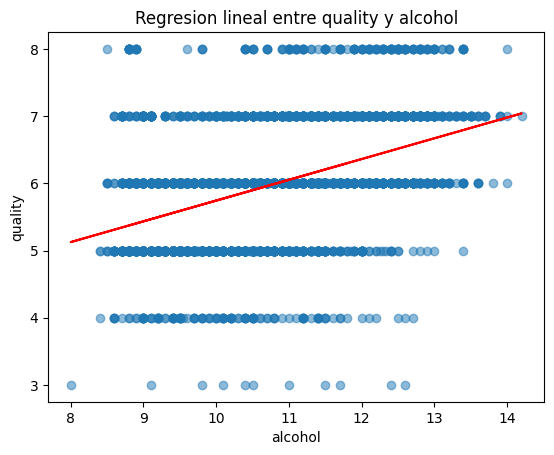

In [317]:
# Mostramos los datos adquiridos
print('El maximo coeficiente de correlacion lineal es:', max_correlacion, 'con', max_valor_correlacion, )
if max_valor_correlacion > 0.5:
    print('Existe una correlacion lineal significativa')
else:
    print('No existe una correlacion lineal significativa')
print('El coeficiente de determinacion es: ', r2, 'por lo que el', round(r2 * 100, 2), '% de la variacion de la variable Y es explicada por la variable X')
print("estadistico de prueba: ", round(t, 2), "estadistico de prueba de student: ", round(t_student, 2))
if abs(t) > t_student:
    print("Se rechaza la hipotesis nula H0: β1 = 0 y concluimos que existe una relacion significativa entre las variables X y Y")
else:
    print('No se rechaza la hipotesis nula H0: β1 = 0 y concluimos que no existe una relacion significativa entre las variables X y Y')

# Graficamos la regresion lineal
plt.scatter(df[max_correlacion], df['quality'], alpha=0.5)
plt.plot(df[max_correlacion], b0 + b1 * df[max_correlacion], 'r')
plt.xlabel(max_correlacion)
plt.ylabel('quality')
plt.title('Regresion lineal entre quality y alcohol')
plt.show()

In [318]:
# Una vez realizadas las pruebas, por simplicidad definimos todas las variables de calculo imporantes

# b0 = coeficiente_interseccion(x, y)
# b1 = coeficiente_pendiente(x, y)
# r2 = coeficiente_determinacion(y, y_pred)
# n = df.shape[0]
# m = df.shape[1]
y_pred = b0 + b1 * df[max_correlacion]
SCE = np.sum((df["quality"] - y_pred)**2)
S = np.sqrt(SCE / (n - 2))
S_xx = np.sum((df[max_correlacion] - df[max_correlacion].mean())**2)
S_yy = np.sum((df["quality"] - df["quality"].mean())**2)
S_xy = np.sum((df[max_correlacion] - df[max_correlacion].mean()) * (df["quality"] - df["quality"].mean()))
r = S_xy / np.sqrt(S_xx * S_yy)
# t = b1 / np.sqrt(S**2 / S_xx)
# t_student = stats.t.ppf(0.975, n - 2)

i) Las inferencias sobre los parámetros de la recta que estimen las fluctuaciones de las mismas, con una
confianza del 95%


Para realizar inferencias sobre los parámetros de la recta de regresión que estiman las fluctuaciones, con un nivel de confianza del 95%, debemos calcular intervalos de confianza para los coeficientes de la regresión lineal, es decir, para la interseccion b0 y la pendiente b1.

El intervalo de confianza del 95% para un coeficiente se calcula utilizando el valor crítico de la distribución t de Student que corresponde al nivel de confianza y los grados de libertad n-2 y la desviación estándar de los errores estándar de los coeficientes de regresión.

\begin{equation*}
    IC(\beta_1) = \beta_1 \pm t_{\alpha/2,n-2} \sqrt{\frac{S^2}{S_{xx}}}
\end{equation*}

\begin{equation*}
    IC(\beta_0) = \beta_0 \pm t_{\alpha/2,n-2} \sqrt{S^2(\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}})}
\end{equation*}

In [319]:
a = 0.05

# Calculamos el intervalo de confianza para la pendiente
def intervalo_confianza_pendiente():
    return b1 - t_student * np.sqrt(S / S_xx), b1 + t_student * np.sqrt(S / S_xx)

# Calculamos el intervalo de confianza para la ordenada en el origen
def intervalo_confianza_ordenada():
    return b0 - t_student * S * np.sqrt(1 / n + df[max_correlacion].mean()**2 / S_xx), b0 + t_student * S * np.sqrt(1 / n + df[max_correlacion].mean()**2 / S_xx)

print('El intervalo de confianza para la pendiente es: ', intervalo_confianza_pendiente())
print('El intervalo de confianza para la ordenada en el origen es: ', intervalo_confianza_ordenada())

El intervalo de confianza para la pendiente es:  (0.2756139293228249, 0.34222381959219195)
El intervalo de confianza para la ordenada en el origen es:  (2.342084440035451, 2.9656194238464564)


ii) La proporción de veces que supera la incertidumbre de la predicción de la calidad a la de respuesta media
de calidad para una característica fija, siendo ambas de la misma confianza y ancho mínimo.


In [341]:
def calcular_proporcion(caracteristica, confianza):
    S_xx = np.sum((df[caracteristica] - df[caracteristica].mean())**2)
    b0 = coeficiente_interseccion(df[caracteristica], df['quality'])
    b1 = coeficiente_pendiente(df[caracteristica], df['quality'])
    SCE = np.sum((df["quality"] - (b0 + b1 * df[caracteristica]))**2)
    S = np.sqrt(SCE / (n - 2))
    t_student = stats.t.ppf(1 - confianza / 2, n - 2)
    media = df[caracteristica].mean()

    intervalo_confianza = (b0 + b1 * media - t_student * np.sqrt(S * (1 / n + (media - media)**2 / S_xx)), b0 + b1 * media + t_student * np.sqrt(S * (1 / n + (media - media)**2 / S_xx)))
    intervalo_prediccion = (b0 + b1 * media - t_student * np.sqrt(S * (1 + 1 / n + (media - media)**2 / S_xx)), b0 + b1 * media + t_student * np.sqrt(S * (1 + 1 / n + (media - media)**2 / S_xx)))
    
    proporcion = (intervalo_prediccion[1] - intervalo_prediccion[0]) / (intervalo_confianza[1] - intervalo_confianza[0])
    return proporcion

# Calculamos la proporcion de vinos de calidad
# Falta arreglar el calculo de la proporcion
confianza = 0.95
proporcion = calcular_proporcion(max_correlacion, confianza)
print('La proporcion de vinos de calidad 7 es: ', proporcion)


(5.908203791831041, 5.909856408837855)
(5.85368593314211, 5.964374267526786)
0.11068833438467607 0.0016526170068136281
La proporcion de vinos de calidad 7 es:  66.97760819858173


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def calcular_proporcion(df, caracteristica, confianza=0.95):
    # Calcular la media y la desviación estándar
    media = df[caracteristica].mean()
    std = df[caracteristica].std()

    # Calcular el intervalo de confianza
    ci = stats.norm.interval(confianza, loc=media, scale=std)

    # Calcular el intervalo de predicción
    pi = stats.norm.interval(confianza, loc=media, scale=std/np.sqrt(len(df)))

    # Calcular la proporción de veces que el intervalo de predicción supera al de confianza
    proporcion = np.sum((df[caracteristica] > pi[0]) & (df[caracteristica] < pi[1])) / np.sum((df[caracteristica] > ci[0]) & (df[caracteristica] < ci[1]))

    return proporcion

# Ejemplo de uso:
proporcion = calcular_proporcion(df, "alcohol")
print(f'La proporción es {proporcion}')


La proporción es 0.0009165902841429881


b) Una ecuación para predecir la calidad del vino a partir de las características.

i) Usando el método de mínimos cuadrados. Con sus respectivos indicadores y una breve explicación de
estas.

El objetivo es encontrar una ecuación que relacione la variable dependiente (calidad del vino) con las variables independientes (características del vino) de forma lineal, es decir, que tenga la forma:
\begin{equation*}
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
\end{equation*}

donde y es la calidad del vino, xi​ son las características del vino y βi​ son los coeficientes que queremos estimar.

para resolver este problema, podemos usar álgebra lineal y expresar la ecuación para minimizar una funcioon de error en forma matricial como

\begin{equation*}
    Y = X\beta
\end{equation*}

donde y es el vector de las calidades del vino, X es la matriz de las características del vino y β es el vector de los coeficientes

Despejando, la solucion del sistema para encontrar los estimadores de los coeficiente sera:
\begin{equation*}
    \beta = X^{-1}Y
\end{equation*}

Una vez que tenemos los coeficientes estimados, podemos usarlos para predecir la calidad del vino para cualquier conjunto de características, usando la ecuación expresada en la funcion prediccion_multiple(vector)
\begin{equation*}
    y^​ = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
\end{equation*}

In [ ]:
def vector_y():
    arr = []
    for i in df.columns:
        if i == "quality":
            arr.append(np.sum(df[i].values))
        else:
            arr.append(np.sum(df[i].values * df["quality"].values))
    return np.array(arr)

def matriz_x():
    matriz = []
    for i in df.columns:
        arr = []
        for j in df.columns:
            if i == "quality" and j == "quality":
                arr.append(len(df))
            elif i == "quality":
                arr.append(np.sum(df[j]))
            elif j == "quality":
                arr.append(np.sum(df[i]))
            else:
                arr.append(np.dot(df[i], df[j]))
        matriz.append(arr)
    return np.array(matriz)
        

Y = vector_y()
X = matriz_x()
b = np.linalg.inv(X).dot(Y)

def prediccion_multiple(b_vector):
    y_multiple = b[0]
    for i in range(1, m):
        y_multiple += b[i] * b_vector[i]
    return y_multiple


ii) Usando el método del descenso del gradiente. Mostrar los resultados obtenidos junto con las últimas
iteraciones del algoritmo Indicar los valores de los parámetros utilizados.

0.0022745379780796794 [ 0.05157473  0.03974958  0.32881505  0.00797493 -0.24579832  0.14474932
  0.4128874 ]


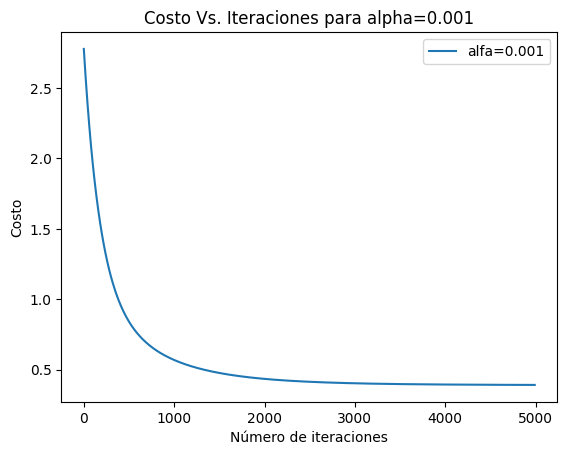

In [ ]:
X = df.drop("quality", axis=1).values # matriz de características
y = df["quality"].values # vector de calidad

# Normalizamos
y = (y - y.mean()) / y.std()
#for i in range(X.shape[1]):
 #   X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
for column in X.T:
    column -= column.mean()
    column /= column.std()

# Inicialización de coeficientes
b = random.random()
w = np.random.rand(m)

a = 0.001 #tasa de aprendizaje
max_iter = 5000 #número máximo de iteraciones
tolerancia = 1e-6 #tolerancia para la condición de parada

# Función para calcular el costo 1/n * SCE
def error_cuadratico_medio(y, y_pred):
    y_residual = y - y_pred
    return np.sum(y_residual**2) / (2 * len(y_residual))

# Actualización de coeficientes usando descenso del gradiente
def actualizar_coeficientes(y_pred, b_0, w_0):
    db = np.sum(y_pred - y) / len(y)
    dw = (np.dot((y_pred - y), X) / len(y))
    b_1 = b_0 - a * db
    w_1 = w_0 - a * dw
    return b_1, w_1

# Función para ejecutar el descenso del gradiente
iteraciones = pd.DataFrame(columns=['iteracion', 'costo'])
result_idx = 0
costo_previo = float('inf')
iter_act = 0

while iter_act < max_iter:
    # La ecuación de predicción para la calidad del vino a partir de las características
    y_pred = b + np.dot(X, w)
    
    costo_act = error_cuadratico_medio(y, y_pred)
    b_previo = b
    w_previo = w
    b, w = actualizar_coeficientes(y_pred, b_previo, w_previo)
    if iter_act % 10 == 0:
        iteraciones.loc[result_idx] = [iter_act, costo_act]
        result_idx += 1
    iter_act += 1
    # Condición de corte basada en la diferencia de costo
    if abs(costo_previo - costo_act) < tolerancia:
        print(f"Se alcanzó la tolerancia en la iteración {iter_act}")
        break
    costo_previo = costo_act

print(b, w)
# Graficar la evolución del costo
plt.plot(iteraciones['iteracion'], iteraciones['costo'], label="alfa=0.001")
plt.legend()
plt.ylabel('Costo')
plt.xlabel('Número de iteraciones')
plt.title('Costo Vs. Iteraciones para alpha=0.001')
plt.show()

¿Estos valores son exactos como los que se consiguen con la resolución del sistema de ecuaciones normales?

No, los valores obtenidos mediante el método del descenso del gradiente generalmente no son exactamente iguales a los que se obtienen mediante la resolución del sistema de ecuaciones normales. El método del descenso del gradiente es un enfoque iterativo que busca minimizar la función de costo, mientras que la resolución del sistema de ecuaciones normales proporciona una solución directa. Las diferencias pueden deberse a la convergencia del algoritmo, la tasa de aprendizaje y otros factores.

Dar una interpretación del criterio de corte particular considerado en el algoritmo y explicar si presenta alguna falla.

El criterio de corte utilizado en el algoritmo es la diferencia absoluta entre el costo actual y el costo previo 

∣). El algoritmo se detiene cuando esta diferencia es menor que la tolerancia especificada. Este criterio de corte es una forma común de determinar la convergencia del algoritmo.

Sin embargo, el criterio de corte basado en la diferencia de costo puede presentar algunos desafíos. En casos en los que la función de costo es ruidosa o tiene múltiples mínimos locales, el algoritmo puede detenerse prematuramente o tardar más en converger. Además, la elección de la tolerancia (
tolerancia
tolerancia) puede afectar la velocidad de convergencia y la precisión del algoritmo.


En caso de no ser una buena condición de corte, ¿podría sugerir algún criterio alternativo más eficaz?

Un criterio alternativo más eficaz para el corte podría ser monitorear el cambio relativo en los coeficientes en lugar del cambio en el costo. Por ejemplo, puedes calcular la norma del cambio relativo de los coeficientes y detener el algoritmo cuando esta norma sea menor que una cierta tolerancia. Esto puede ser más robusto y eficaz en algunos casos.

Aquí tienes un ejemplo de cómo podrías implementar este criterio alternativo:
Este criterio considera la estabilidad de los coeficientes y puede ser más adecuado en casos en los que la convergencia sea más difícil de determinar utilizando solo la diferencia en el costo.

In [ ]:
# Calcular la norma del cambio relativo en los coeficientes
cambio_coefs = np.linalg.norm(w - w_previo) / np.linalg.norm(w_previo)

# Criterio de corte basado en el cambio relativo en los coeficientes
if cambio_coefs < tolerancia:
    print(f"Se alcanzó la tolerancia en la iteración {iter_act}")

iii) El método del gradiente, ¿siempre converge al mínimo de la función? Explicar o dar un contraejemplo.

El método del gradiente es un algoritmo que funciona iterativamente, moviéndose en la dirección del gradiente negativo de la función en cada paso acercandose al mínimo de la función. Si la función es convexa, el algoritmo converge al mínimo global. Sin embargo, si la función no es convexa y se tienen valores iniciales no adecuados, el algoritmo puede converger a un mínimo local o a un punto de silla.

un punto de silla es un punto en el que el gradiente es cero, pero no es un mínimo local. En este caso, el algoritmo puede detenerse prematuramente, ya que no hay un gradiente negativo que indique la dirección de descenso.

un minimo local es un punto en el que el gradiente es cero y es menor que el gradiente en todos los puntos vecinos. En este caso, el algoritmo puede detenerse prematuramente, ya que no hay un gradiente negativo que indique la dirección de descenso.

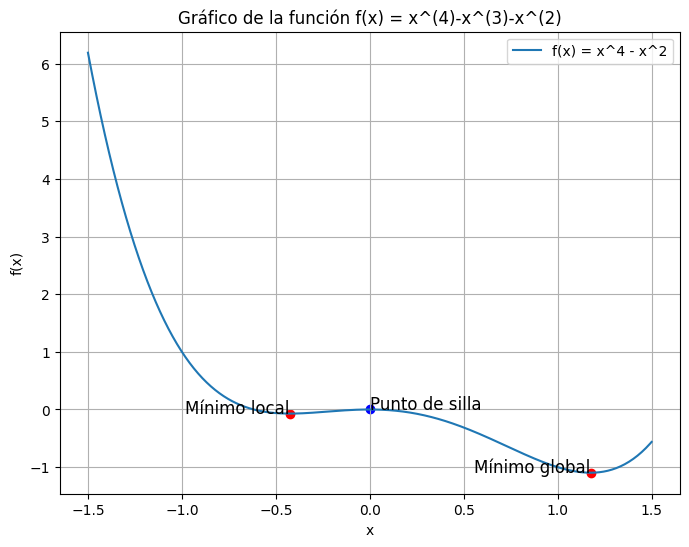

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y sus puntos críticos
f = lambda x: x**4 - x**3 - x**2
x = np.linspace(-1.5, 1.5, 400)
y = f(x)

# Puntos críticos
min_local = -0.42539
min_global = 1.17539
punto_silla = 0

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^4 - x^2")
plt.scatter([min_local, min_global], [f(min_local), f(min_global)], color='red') # mínimos
plt.scatter([punto_silla], [f(punto_silla)], color='blue') # punto de silla
plt.text(min_local, f(min_local), 'Mínimo local', fontsize=12, ha='right')
plt.text(min_global, f(min_global), 'Mínimo global', fontsize=12, ha='right')
plt.text(punto_silla, f(punto_silla), 'Punto de silla', fontsize=12, ha='left')
plt.legend()
plt.grid(True)
plt.title('Gráfico de la función f(x) = x^(4)-x^(3)-x^(2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
